In [98]:
import yfinance as yf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [81]:
TICKER_NAMES = ['msft','goog','fb','amzn', 'pg', 'xom', 'INTC', 'GS', 'GE']
DF_SET = []
STOCKS = pd.DataFrame()
DIR_STOCKS = 'stocks/'

def stock_dir_exists():
    if not os.path.exists(DIR_STOCKS):
        os.makedirs(DIR_STOCKS)

def fetch_quotes_yf(ticker):
    price_df = pd.DataFrame(yf.Ticker(str(ticker)).history(period="10y"), columns=['Open','High','Low','Close','Volume'])            
    price_df.to_csv(DIR_STOCKS + str(ticker))
    return price_df

def load_tickers_df(ticker_names):
    stock_dir_exists()
    for i in ticker_names:
        ticker_filename = DIR_STOCKS + str(i) + '.csv'
        if os.path.isfile(ticker_filename) == False:
            df = fetch_quotes_yf(i)
        else:
            df = pd.read_csv(ticker_filename)
        df[str(i)] = df['Close']
        df.drop(df.columns.difference([str(i)]), 1, inplace=True)
        DF_SET.append(df)
    return pd.concat(DF_SET, axis = 1)
        
STOCKS = load_tickers_df(TICKER_NAMES)

In [83]:
log_ret = np.log(STOCKS/STOCKS.shift(1))
log_ret.head()

,msft,goog,fb,amzn,pg,xom,INTC,GS,GE
Date,,,,,,,,,
2010-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,-0.016316,0.000708,NaN,-0.005948,-0.006252,-0.001039,-0.002435,-0.004383,-0.005479
2010-04-01,-0.004338,0.002969,NaN,-0.029601,0.001513,0.009310,0.004863,-0.002436,0.007819
2010-04-05,0.003472,0.003875,NaN,-0.002431,0.006243,0.008408,0.008454,0.017129,0.010844
2010-04-06,0.001732,-0.004899,NaN,0.030484,-0.010137,-0.004092,-0.008454,-0.001466,0.003077


In [85]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(STOCKS.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(9))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [92]:
print("Max Sharpe ratio in the array: {}".format(sharpe_arr.max()))
print("It's location in the array: {}".format(sharpe_arr.argmax()))

Max Sharpe ratio in the array: 0.8439167751550959
It's location in the array: 5889


In [95]:
print(all_weights[5889,:])
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

[0.1866818  0.21162074 0.06934285 0.28316185 0.19132621 0.03249277
 0.00477247 0.0048861  0.01571521]


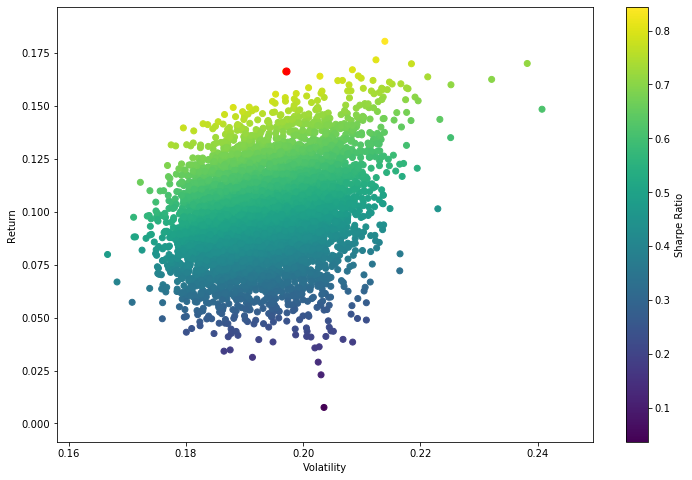

In [99]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()